Bài 1

In [79]:
import pandas as pd

df = pd.read_csv('https://cloud.vinhthanh.net/s/3MpCNPWDiH7reec/download/Property%20Sales%20of%20Melbourne%20City.csv')
print(df)

       Unnamed: 0        Suburb           Address  Rooms Type    Price Method  \
0               1    Abbotsford      85 Turner St      2    h  1480000      S   
1               2    Abbotsford   25 Bloomburg St      2    h  1035000      S   
2               4    Abbotsford      5 Charles St      3    h  1465000     SP   
3               5    Abbotsford  40 Federation La      3    h   850000     PI   
4               6    Abbotsford       55a Park St      4    h  1600000     VB   
...           ...           ...               ...    ...  ...      ...    ...   
18391       23540  Williamstown   8/2 Thompson St      2    t   622500     SP   
18392       23541  Williamstown      96 Verdon St      4    h  2500000     PI   
18393       23544     Yallambie      17 Amaroo Wy      4    h  1100000      S   
18394       23545    Yarraville        6 Agnes St      4    h  1285000     SP   
18395       23546    Yarraville     33 Freeman St      4    h  1050000     VB   

          SellerG        Da

In [13]:
import numpy as np

variance = np.var(df['Price'], ddof=1)
second_central_moment = np.mean((df['Price'] - np.mean(df['Price']))**2)
kurtosis = np.mean((df['Price'] - np.mean(df['Price']))**4) / variance**2

print('Phương sai:', variance)
print('Moment trung tâm thứ 2:', second_central_moment)
print('Độ dẹt:', kurtosis)

Phương sai: 412063426191.14435
Moment trung tâm thứ 2: 412041026570.2381
Độ dẹt: 13.368500000011778


Bài 2

In [20]:
df_filter = df[(df['Type'] == 't') & (df['Lattitude'].notnull()) & (df['Longtitude'].notnull()) & (df['YearBuilt'] >= 2010)]
print(df_filter)

       Unnamed: 0          Suburb             Address  Rooms Type    Price  \
29             40      Abbotsford  13/11 Nicholson St      3    t   900000   
52             66    Airport West       154 Halsey Rd      3    t   840000   
67             82    Airport West      2/252 Parer Rd      2    t   450000   
97            112    Airport West        3/7 South Rd      3    t   540000   
192           232          Altona      1/123 Blyth St      2    t   720000   
...           ...             ...                 ...    ...  ...      ...   
18253       23372     Pascoe Vale      1B Braeside St      2    t   636500   
18255       23374     Pascoe Vale       2/7 Joffre Rd      4    t   745000   
18259       23378  Port Melbourne        44 Garton St      4    t  2455000   
18385       23534  West Footscray     1/21 Waratah St      2    t   655000   
18391       23540    Williamstown     8/2 Thompson St      2    t   622500   

      Method        SellerG        Date  Distance  ...  Bathroo

Bài 3

In [78]:
import plotly.graph_objs as go

h105 = df.iloc[90][['Bedroom2', 'Bathroom', 'Car']]
h106 = df.iloc[91][['Bedroom2', 'Bathroom', 'Car']]

fig = go.Figure(data= go.Parcoords(
            line=dict(color='blue'),
            dimensions=list([
                dict(label='Bedroom2', values=[h105['Bedroom2'], h106['Bedroom2']]),
                dict(label='Bathroom', values=[h105['Bathroom'], h106['Bathroom']]),
                dict(label='Car', values=[h105['Car'], h106['Car']])
            ])
    )
)

fig.update_layout(
    title='Tương quan giữa số phòng ngủ, số phòng tắm và số chỗ đậu xe của nhà 105 và 106'
)

fig.show()

Bài 4

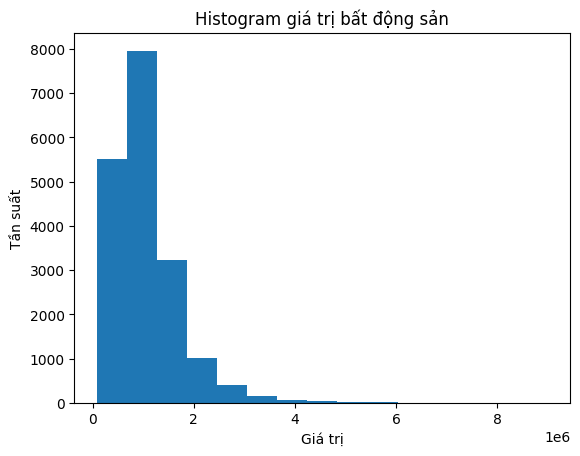

In [63]:
import matplotlib.pyplot as plt

price = df['Price']

n = len(price)

k = 1 + int(np.log2(n))

bin_range = (price.max() - price.min()) / k
bin_min = price.min()
bin_max = price.max()
bin_width = bin_range

plt.hist(price, bins=k, range=(bin_min, bin_max), rwidth=bin_width)

plt.title('Histogram giá trị bất động sản')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')

plt.show()


Bài 5

Beta: 0.9636450275752199
Hệ số chặn: 343.9288388528961


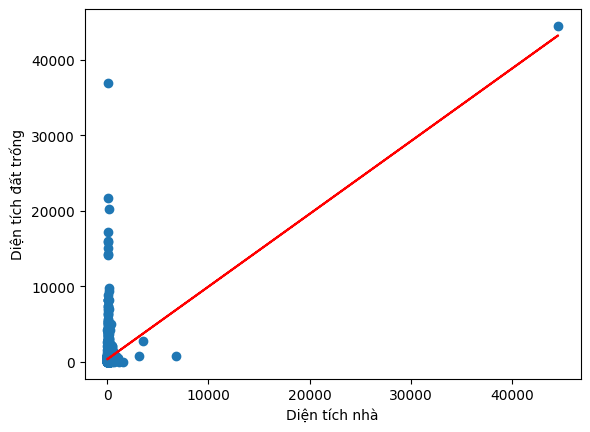

In [77]:
df_5 = df[(df['BuildingArea'].notna()) & (df['Landsize'].notna())]

x = df_5['BuildingArea']
y = df_5['Landsize']

coef = np.polyfit(x, y, 1)

print('Beta:', coef[0])
print('Hệ số chặn:', coef[1])

plt.scatter(x, y)
plt.plot(x, coef[0]*x + coef[1], color='red')
plt.xlabel('Diện tích nhà')
plt.ylabel('Diện tích đất trống')
plt.show()